<a href="https://colab.research.google.com/github/loyedan/ELAIS--QST-2024-25-CANADA/blob/main/Lecture01_PyTorchSpirals_Solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lecture 1:
# Feedforward neural networks in PyTorch
# SOLUTIONS

E-Learning African International School on Quantum Science and Technology

Sept 18, 2024

Code by Lauren Hayward, Juan Carrasquilla, and Mohamed Hibat Allah

## Problem set-up

Today's objective is to become comfortable with using the Python package PyTorch to
create and train a simple feedforward neural network for supervised learning.

You will use and modify the code in this notebook.
The first section of the code generates a random dataset of two-dimensional points with $\texttt{K}$ branches.
For example, when $\texttt{K=3}$ this dataset might look as follows:

<!--- ![darts](https://drive.google.com/uc?id=1gQJiU6wZTlE8yE0ArjO6bFFMfgGCICN5) -->

<h2 align="center">
<img src="https://drive.google.com/uc?id=1Pma18KS7rj9bGDjbmRSC0rGLZThcUyYX"
width="400">
 </h2>


For each datapoint $\mathbf{x} = (x_1, x_2)$, the label is the branch index such that $y = 0, 1$ or 2 for the example above.
Our goal is to implement a neural network capable of classifying the branches.

This network will compare its output with labels in the so-called *one-hot encoding*.
For a given label $\texttt{y=k}$, the corresponding one-hot encoding is a $\texttt{K}$-dimensional vector with all entries zero
except for the $\texttt{k}^\text{th}$ entry (which has value 1).
So when $\texttt{K=3}$ the one-hot encodings for the labels are
\begin{equation*}
0 \rightarrow \begin{bmatrix} 1 \\ 0 \\ 0 \end{bmatrix}, \qquad
1 \rightarrow \begin{bmatrix} 0 \\ 1 \\ 0 \end{bmatrix}, \qquad
2 \rightarrow \begin{bmatrix} 0 \\ 0 \\ 1 \end{bmatrix}.
\end{equation*}

The code first defines the structure of the neural network
and then uses the dataset to train this network.
The code can generate two files: $\texttt{spiral_data.pdf}$ (a plot of the dataset such as the one above)
and $\texttt{spiral_results.pdf}$ (which displays three plots illustrating the results of training).

## Exercises

**Exercise \#1:** Run the code in the cells below and look at how it attempts to classify the two-dimensional space.
You should find that the resulting classifier separates the two-dimensional space using lines,
and thus does a poor job of representing the data.

SOLUTION: Using the parameters provided (with the learning rate set to 1), you should find that the given network classifies the two-dimensional space similarly to the plots below. Note that the random seed will be different for every execution, so your results may vary slightly.

<!--- ![darts](https://drive.google.com/uc?id=1gQJiU6wZTlE8yE0ArjO6bFFMfgGCICN5) -->

<h2 align="center">
<img src="https://drive.google.com/uc?id=1QQZMx1cck1y_T-TK_xIduBEEUGFMqiBe"
width="600">
 </h2>

**Exercise \#2:** Look through the section of code labelled "Define the network architecture and training hyperparameters".
Draw the neural network corresponding to the one in the code for the case of $\texttt{K}$ branches.
Pay particular attention to the number of neurons in each layer.

SOLUTION: The neural network for the given code is:

<!--- ![darts](https://drive.google.com/uc?id=1gQJiU6wZTlE8yE0ArjO6bFFMfgGCICN5) -->

<h2 align="center">
<img src="https://drive.google.com/uc?id=183oTo5ONZAmlW_nYI_LHLyv8AeDbU79S"
width="200">
 </h2>

**Exercise \#3:** Add in a hidden layer with 4 neurons and study how this hidden layer changes the output.
Draw the neural network in this case.

SOLUTION: See the cells below for the code that needs to be modified.

After adding a hidden layer with 4 neurons, the neural network is shown below, where the last layer has $\texttt{K}$ neurons.

<!--- ![darts](https://drive.google.com/uc?id=1gQJiU6wZTlE8yE0ArjO6bFFMfgGCICN5) -->

<h2 align="center">
<img src="https://drive.google.com/uc?id=1ONxS3rsxQfq2_KKD-mt2SbtRcSwOW62u"
width="300">
 </h2>

**Exercise \#4:** Replace the sigmoid activation function on the first layer with a rectified linear unit (ReLU), and the one on the output layer with a softmax function.
Study how the choices of activation functions change the output.

SOLUTION: Replace the line `a1 = self.sigmoid(linear1_out)` with:

`a1 = self.relu(linear1_out)`

Similarly, replace the line `a2 = self.sigmoid(linear2_out)` with:

`a2 = self.softmax(linear2_out)`

**Exercise \#5:** Study the effects of increasing and decreasing the $\texttt{learning_rate}$ hyperparameter.

SOLUTION: When the learning rate is very small, the algorithm takes very small steps and can take a long time to find a local minimum.
When the learning rate is too big, results can become unstable as the steps can become too large and we often ``overshoot" local minima.
For further discussion about the affects of changing the learning rate, see Section IVA of $\texttt{arXiv:1803.08823}$.

**Exercise \#6:** Explain why the $\texttt{K}$-dimensional one-hot encoding is useful. What do you think would happen if you used a one-dimensional label (such that $\texttt{y}=0,1,\ldots, \texttt{K}-1$ or $\texttt{K}$) instead?

SOLUTION: As an illustrative example, consider the case where there are $\texttt{K=3}$ branches and the network is uncertain about whether the datapoint $\mathbf{x}$ belongs to branch 0 or branch 2.
Specifically, let's say that the network is
50\% sure that $\mathbf{x}$ belongs to branch 0 and
50\% sure that it belongs to branch 2.
This situation is easy to express in terms of the one-hot encoding as
\begin{equation*}
\mathbf{a}^{(L)} = \begin{bmatrix} 0.5 \\ 0 \\ 0.5 \end{bmatrix}.
\end{equation*}
Using a one-dimensional encoding, the network would only return a single number between 0 and 2. In this case, it might return the average predicted label such that
\begin{equation*}
\mathbf{a}^{(L)} = \begin{bmatrix} \frac{0+2}{2} \end{bmatrix} = \begin{bmatrix} 1 \end{bmatrix},
\end{equation*}
which is the same as the output it would return if it was certain that $\mathbf{x}$ belongs to branch 1.
Thus, we see that a one-dimensional encoding can give network outputs that are hard to interpret when the number of classes $\texttt{K}$ is greater than 2.

**Exercise \#7:** What do you predict will happen to the training accuracy when you vary each of the following quantities? Repeat the training for different values of these quantities to see if your predictions are correct. Can you find any cases where the neural network appears to be overfitting?

**a)** the number of neurons in the hidden layer,

**b)** the magnitude of noise in the data, $\texttt{mag_noise}$,

**c)** the nubmer of different labels, $\texttt{K}$.

SOLUTION:  

**a)** The training accuracy generally increases number of neurons in the hidden layer increases. You might also notice overfitting when the number of hidden neurons becomes too high.

**b)** The training accuracy tends to decrease as the data has more noise. You might also notice cases where the neural networks starts overfitting to the noise.

**c)** The training accuracy generally decreases as the number of branches increases.

A specific example where the network is overfitting to the noise in the data is shown below:

<!--- ![darts](https://drive.google.com/uc?id=1gQJiU6wZTlE8yE0ArjO6bFFMfgGCICN5) -->

<h2 align="center">
<img src="https://drive.google.com/uc?id=1PJPhh_CdLh-15VYqMRXtrktrx_kDf0Rq"
width="400">
 </h2>

## Create and plot the data set


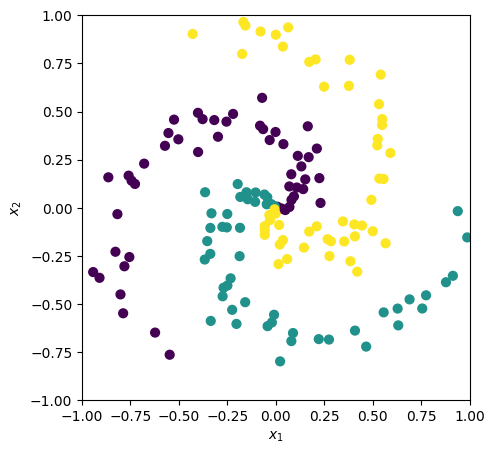

In [ ]:
from google.colab import files
import matplotlib.pyplot as plt
import numpy as np

N = 50 # number of points per branch
K = 3  # number of branches

N_train = N*K # total number of points in the training set
x_train = np.zeros((N_train,2)) # matrix containing the 2-dimensional datapoints
y_train = np.zeros(N_train, dtype='uint8') # labels (not in one-hot representation)

mag_noise = 0.3  # controls how much noise gets added to the data
dTheta    = 4    # difference in theta in each branch

### Data generation: ###
for j in range(K):
  ix = range(N*j,N*(j+1))
  r  = np.linspace(0.01,1,N) # radius
  th = np.linspace(j*(2*np.pi)/K,j*(2*np.pi)/K + dTheta,N) + np.random.randn(N)*mag_noise # theta
  x_train[ix] = np.c_[r*np.cos(th), r*np.sin(th)]
  y_train[ix] = j

### Plot the data set: ###
fig = plt.figure(1, figsize=(5,5))
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, s=40)#, cmap=plt.cm.Spectral)
plt.xlim([-1,1])
plt.ylim([-1,1])
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.savefig('spiral_data.pdf', bbox_inches="tight")
plt.show()

In [ ]:
#Run this cell if you want to save a pdf plot of the dataset:
#files.download('spiral_data.pdf')

## Define the network architecture and training hyperparameters

In [ ]:
%matplotlib inline
from IPython import display

import time
import torch

# class FeedforwardNN(torch.nn.Module):
#     def __init__(self, input_size, output_size):
#         super(FeedforwardNN, self).__init__()

#         #layer sizes:
#         self.input_size = input_size
#         self.output_size = output_size

#         #functions used within the Feedforward NN:
#         self.linear1 = torch.nn.Linear(self.input_size, self.output_size)
#         self.relu    = torch.nn.ReLU()
#         self.sigmoid = torch.nn.Sigmoid()
#         self.softmax = torch.nn.Softmax()
#     def forward(self, x):
#         #Layer 1:
#         linear1_out = self.linear1(x)
#         a1 = self.sigmoid(linear1_out)

#         #Network output:
#         aL = a1

#         return aL

# input_size = 2
# output_size = K
# model = FeedforwardNN(input_size, output_size)

### SOLUTION TO EXERCISE 3 ###
class FeedforwardNN(torch.nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(FeedforwardNN, self).__init__()

        #layer sizes:
        self.input_size = input_size
        self.hidden_size  = hidden_size
        self.output_size = output_size

        #functions used within the Feedforward NN:
        self.linear1 = torch.nn.Linear(self.input_size, self.hidden_size)
        self.linear2 = torch.nn.Linear(self.hidden_size, self.output_size)
        self.relu    = torch.nn.ReLU()
        self.sigmoid = torch.nn.Sigmoid()
        self.softmax = torch.nn.Softmax()
    def forward(self, x):
        #Layer 1:
        linear1_out = self.linear1(x)
        a1 = self.sigmoid(linear1_out)
        # a1 = self.relu(linear1_out) #Solution to Problem 1d

        #Layer 2:
        linear2_out = self.linear2(a1)
        a2 = self.sigmoid(linear2_out)
        # a2 = self.softmax(linear2_out) #Solution to Problem 1d

        #Network output:
        aL = a2

        return aL

input_size  = 2
output_size = K
hidden_size = 4 #number of hidden units
model = FeedforwardNN(input_size, hidden_size, output_size)
### END OF MODIFICATIONS FOR EXERCISE 3 ###

### Store the input data as a PyTorch tensor ###
x_train = torch.tensor(x_train, dtype = torch.float)

### One hot encoding ###
y_onehot = np.zeros((y_train.size, K))
y_onehot[np.arange(y_train.size),y_train] = 1
y_onehot = torch.tensor(y_onehot, dtype = torch.float)

### Use backpropagation to minimize the cost function using the gradient descent algorithm: ###
learning_rate = 1
# optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

### Cost function: ###
cost_func = torch.nn.MSELoss()

N_epochs = 50000 # number of times to run gradient descent

<ipython-input-7-fbd3748c6668>:73: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x_train = torch.tensor(x_train, dtype = torch.float)


## Training

Final Training cost 0.160000
Final Training accuracy 0.733333



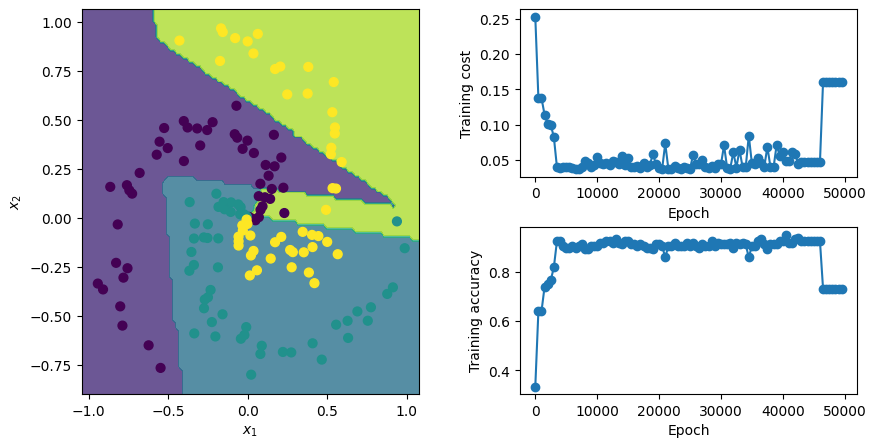

In [ ]:
epoch_list    = []
cost_training = []
acc_training  = []

############ Function for plotting: ############
def updatePlot():

    ### Generate coordinates covering the whole plane: ###
    padding = 0.1
    spacing = 0.02
    x1_min, x1_max = x_train[:, 0].min() - padding, x_train[:, 0].max() + padding
    x2_min, x2_max = x_train[:, 1].min() - padding, x_train[:, 1].max() + padding
    x1_grid, x2_grid = np.meshgrid(np.arange(x1_min, x1_max, spacing),
                         np.arange(x2_min, x2_max, spacing))

    torch_input = torch.tensor(np.c_[x1_grid.ravel(), x2_grid.ravel()], dtype = torch.float)
    NN_output = model(torch_input)
    predicted_class = np.argmax(NN_output.detach().numpy(), axis=1)

    ### Plot the classifier: ###
    plt.subplot(121)
    plt.contourf(x1_grid, x2_grid, predicted_class.reshape(x1_grid.shape), K, alpha=0.8)
    plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, s=40)
    plt.xlim(x1_grid.min(), x1_grid.max())
    plt.ylim(x2_grid.min(), x2_grid.max())
    plt.xlabel(r'$x_1$')
    plt.ylabel(r'$x_2$')

    ### Plot the cost function during training: ###
    plt.subplot(222)
    plt.plot(epoch_list,cost_training,'o-')
    plt.xlabel('Epoch')
    plt.ylabel('Training cost')

    ### Plot the training accuracy: ###
    plt.subplot(224)
    plt.plot(epoch_list,acc_training,'o-')
    plt.xlabel('Epoch')
    plt.ylabel('Training accuracy')
############ End of plotting function ############

### Train for several epochs: ###
for epoch in range(N_epochs):

    optimizer.zero_grad() # sets the gradients to zero (necessary since PyTorch accumulates the gradients)
    NN_output = model(x_train) # Neural network output
    cost = cost_func(NN_output, y_onehot)
    cost.backward() #computes the gradients
    optimizer.step() #updating the parameters

    ### Update the plot and print results every 500 epochs: ###
    if epoch % 500 == 0:
        predicted_class = np.argmax(NN_output.detach().numpy(), axis=1)
        accuracy = np.mean(predicted_class == y_train)

        epoch_list.append(epoch)
        cost_training.append(cost.detach().numpy())
        acc_training.append(accuracy)

        ### Update the plot of the resulting classifier: ###
        fig = plt.figure(2,figsize=(10,5))
        fig.subplots_adjust(hspace=.3,wspace=.3)
        plt.clf()
        updatePlot()
        display.display(plt.gcf())
        print("Iteration %d:\n  Training cost %f\n  Training accuracy %f\n" % (epoch, cost, accuracy) )
        display.clear_output(wait=True)
        # time.sleep(0.1) #Uncomment this line if you want to slow down the rate of plot updates

plt.savefig('spiral_results.pdf', bbox_inches="tight")
print("Final Training cost %f\nFinal Training accuracy %f\n" % (cost, accuracy) )

In [ ]:
#Run this cell if you want to save a pdf plot of the results:
#files.download('spiral_results.pdf')